In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

In [2]:
genome_scores = pd.read_csv('genome-scores.csv')

In [3]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [4]:
genome_tags = pd.read_csv('genome-tags.csv')

In [5]:
links = pd.read_csv('links.csv')

In [6]:
movie_industry = pd.read_csv('movie_industry.csv', encoding='latin-1')
movie_industry = movie_industry.rename(columns={"name":"title"})
movie_industry.head()

,budget,company,country,director,genre,gross,title,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [7]:
movies = pd.read_csv('movies.csv')
func = lambda x: x.rsplit(' ', 1)[0]
movies['title']=movies['title'].apply(func)
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [8]:
ratings = pd.read_csv('ratings.csv')

In [9]:
tags = pd.read_csv('tags.csv')

In [10]:
oscar = pd.read_csv('the_oscar_award.csv')

In [11]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [12]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [13]:
movie_industry = movie_industry.rename(columns={"name":"title"})

In [14]:
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [15]:
ratings.head() #28 million rows should append files to here

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [16]:
tags.head() #merge with ratings

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [17]:
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [18]:
merged = ratings.merge(tags, on=['userId','movieId'])

In [19]:
merged.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y
0,14,110,4.5,1442169623,epic,1443148538
1,14,110,4.5,1442169623,Medieval,1443148532
2,14,318,4.5,1442169454,imdb top 250,1442615195
3,14,318,4.5,1442169454,justice,1442615192
4,14,480,4.5,1442169372,Dinosaurs,1443148563


In [20]:
merged_2 = merged.merge(movies, on=['movieId'])

In [21]:
merged_2.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,14,110,4.5,1442169623,epic,1443148538,Braveheart,Action|Drama|War
1,14,110,4.5,1442169623,Medieval,1443148532,Braveheart,Action|Drama|War
2,815,110,2.5,1053219399,overrated,1150006110,Braveheart,Action|Drama|War
3,2577,110,4.5,1378324220,Oscar (Best Picture),1378324225,Braveheart,Action|Drama|War
4,3086,110,5.0,1462977009,epic,1463675332,Braveheart,Action|Drama|War


In [22]:
merged_3 = genome_scores.merge(movies, on=['movieId'])

In [23]:
merged_3.head()

,movieId,tagId,relevance,title,genres
0,1,1,0.02900,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,1,2,0.02375,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
2,1,3,0.05425,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
3,1,4,0.06875,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
4,1,5,0.16000,Toy Story,Adventure|Animation|Children|Comedy|Fantasy


In [24]:
merged_tags = merged_3.merge(genome_tags, on=['tagId'])

In [25]:
merged_tags.head()

,movieId,tagId,relevance,title,genres,tag
0,1,1,0.02900,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,007
1,2,1,0.03625,Jumanji,Adventure|Children|Fantasy,007
2,3,1,0.04150,Grumpier Old Men,Comedy|Romance,007
3,4,1,0.03350,Waiting to Exhale,Comedy|Drama|Romance,007
4,5,1,0.04050,Father of the Bride Part II,Comedy,007


In [26]:
func = lambda x: x.rsplit(' ', 1)[0]
merged_tags['title']=merged_tags['title'].apply(func)

In [27]:
merged_tags.head()

,movieId,tagId,relevance,title,genres,tag
0,1,1,0.02900,Toy,Adventure|Animation|Children|Comedy|Fantasy,007
1,2,1,0.03625,Jumanji,Adventure|Children|Fantasy,007
2,3,1,0.04150,Grumpier Old,Comedy|Romance,007
3,4,1,0.03350,Waiting to,Comedy|Drama|Romance,007
4,5,1,0.04050,Father of the Bride Part,Comedy,007


In [28]:
merged_tags_industry = merged_tags.merge(movie_industry, on=['title'])

In [29]:
merged_tags_industry.head()

,movieId,tagId,relevance,title,genres,tag,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,2,1,0.03625,Jumanji,Adventure|Children|Fantasy,007,50000000.0,TriStar Pictures,USA,Joe Johnston,Action,100475249.0,PG,1995-12-15,104,6.9,Robin Williams,232339,Jonathan Hensleigh,1995
1,2,2,0.03625,Jumanji,Adventure|Children|Fantasy,007 (series),50000000.0,TriStar Pictures,USA,Joe Johnston,Action,100475249.0,PG,1995-12-15,104,6.9,Robin Williams,232339,Jonathan Hensleigh,1995
2,2,3,0.08275,Jumanji,Adventure|Children|Fantasy,18th century,50000000.0,TriStar Pictures,USA,Joe Johnston,Action,100475249.0,PG,1995-12-15,104,6.9,Robin Williams,232339,Jonathan Hensleigh,1995
3,2,4,0.08175,Jumanji,Adventure|Children|Fantasy,1920s,50000000.0,TriStar Pictures,USA,Joe Johnston,Action,100475249.0,PG,1995-12-15,104,6.9,Robin Williams,232339,Jonathan Hensleigh,1995
4,2,5,0.10200,Jumanji,Adventure|Children|Fantasy,1930s,50000000.0,TriStar Pictures,USA,Joe Johnston,Action,100475249.0,PG,1995-12-15,104,6.9,Robin Williams,232339,Jonathan Hensleigh,1995


In [30]:
tags_and_industry = merged_tags_industry.sort_values(by=['relevance'], ascending=False)

In [31]:
merged_tags_industry.sort_values(by=['score'], ascending=False)

,movieId,tagId,relevance,title,genres,tag,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
1767768,79132,193,0.45225,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,cgi,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1767672,79132,97,0.23975,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,bad acting,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1768047,79132,472,0.66775,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,greed,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1768048,79132,473,0.20550,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,grim,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1767673,79132,98,0.19875,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,bad cgi,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1768049,79132,474,0.22125,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,grindhouse,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1768050,79132,475,0.22775,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,gritty,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1768051,79132,476,0.01000,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,gross-out,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1768052,79132,477,0.01500,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,gruesome,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010
1767674,79132,99,0.53550,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,bad ending,160000000.0,Warner Bros.,USA,Christopher Nolan,Action,292576195.0,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010


In [32]:
merged_2['title']=merged_2['title'].apply(func)

In [33]:
merged_2.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,14,110,4.5,1442169623,epic,1443148538,Braveheart,Action|Drama|War
1,14,110,4.5,1442169623,Medieval,1443148532,Braveheart,Action|Drama|War
2,815,110,2.5,1053219399,overrated,1150006110,Braveheart,Action|Drama|War
3,2577,110,4.5,1378324220,Oscar (Best Picture),1378324225,Braveheart,Action|Drama|War
4,3086,110,5.0,1462977009,epic,1463675332,Braveheart,Action|Drama|War


In [34]:
merged_user_ratings = merged_2.merge(movie_industry, on=['title'])

In [35]:
merged_user_ratings #sentiment scores?

,userId,movieId,rating_x,timestamp_x,tag,timestamp_y,title,genres,budget,company,...,genre,gross,rating_y,released,runtime,score,star,votes,writer,year
0,14,110,4.5,1442169623,epic,1443148538,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
1,14,110,4.5,1442169623,Medieval,1443148532,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
2,815,110,2.5,1053219399,overrated,1150006110,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
3,2577,110,4.5,1378324220,Oscar (Best Picture),1378324225,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
4,3086,110,5.0,1462977009,epic,1463675332,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
5,3086,110,5.0,1462977009,inspirational,1463675342,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
6,3086,110,5.0,1462977009,war,1463675328,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
7,5848,110,4.0,1432234167,epic,1432234174,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
8,5848,110,4.0,1432234167,historical,1432234185,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995
9,5848,110,4.0,1432234167,Medieval,1432234179,Braveheart,Action|Drama|War,72000000.0,Icon Entertainment International,...,Biography,75600000.0,R,1995-05-24,178,8.4,Mel Gibson,807256,Randall Wallace,1995


Text(0.5, 1.0, 'Votes vs. Score')

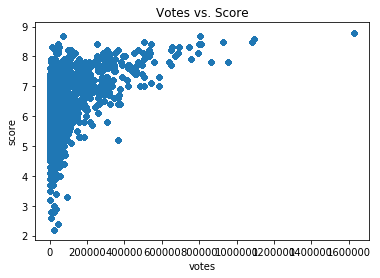

In [36]:
merged_tags_industry.plot.scatter('votes','score')
plt.title("Votes vs. Score")

Text(0.5, 1.0, 'Movie Id vs. Rating')

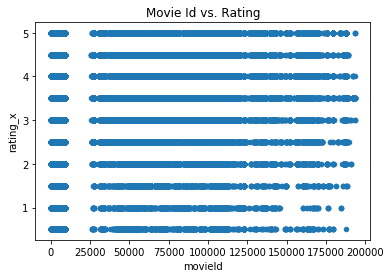

In [37]:
merged_user_ratings.plot.scatter('movieId','rating_x')
plt.title("Movie Id vs. Rating")

,userId,movieId,rating_x,timestamp_x,timestamp_y,budget,gross,runtime,score,votes,year
userId,1.000000,-0.008863,0.071297,-0.009979,-0.043744,0.010428,0.013435,-0.002451,0.011259,0.021223,-0.005009
movieId,-0.008863,1.000000,-0.026841,0.404969,0.360699,0.199987,0.140419,0.020635,0.063342,0.128307,0.701264
rating_x,0.071297,-0.026841,1.000000,0.011760,0.023198,-0.000194,0.007386,0.083799,0.255538,0.162324,-0.010035
timestamp_x,-0.009979,0.404969,0.011760,1.000000,0.882488,0.078372,0.047297,0.014025,0.056314,0.082064,0.280570
timestamp_y,-0.043744,0.360699,0.023198,0.882488,1.000000,0.061186,0.036964,0.015825,0.052284,0.074657,0.232890
budget,0.010428,0.199987,-0.000194,0.078372,0.061186,1.000000,0.766550,0.471268,0.197447,0.611409,0.318661
gross,0.013435,0.140419,0.007386,0.047297,0.036964,0.766550,1.000000,0.369321,0.288358,0.626426,0.170060
runtime,-0.002451,0.020635,0.083799,0.014025,0.015825,0.471268,0.369321,1.000000,0.392468,0.464077,0.037536
score,0.011259,0.063342,0.255538,0.056314,0.052284,0.197447,0.288358,0.392468,1.000000,0.627036,0.036712
votes,0.021223,0.128307,0.162324,0.082064,0.074657,0.611409,0.626426,0.464077,0.627036,1.000000,0.207879


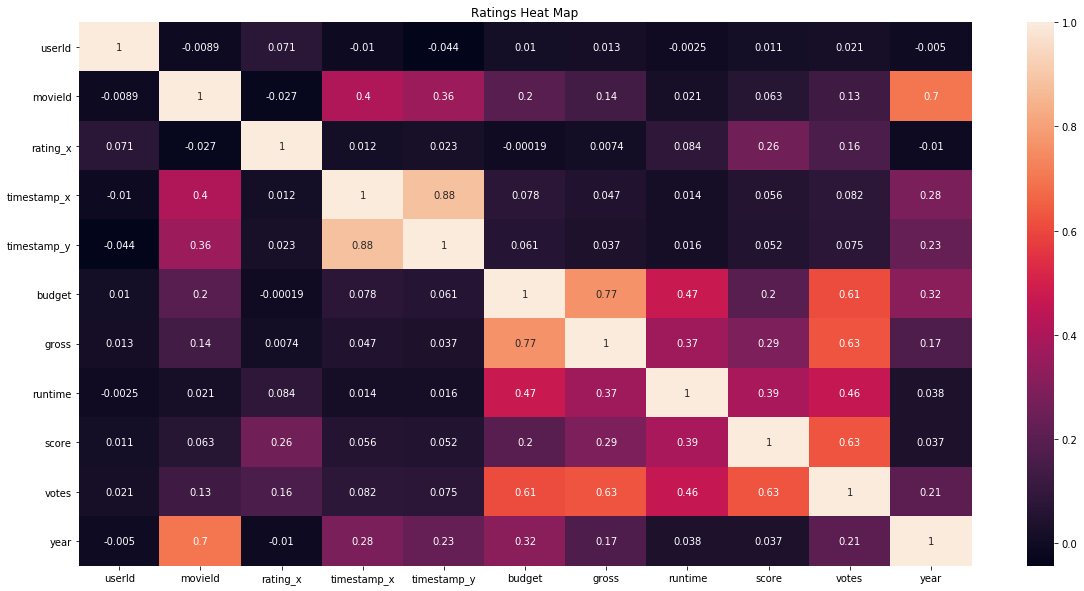

In [38]:
plt.figure(figsize=(20,10))
plt.title("Ratings Heat Map")
heat = merged_user_ratings.corr()
sns.heatmap(heat,annot=True) #heatmap showing correlation among variables to find relationships
heat

,movieId,tagId,relevance,budget,gross,runtime,score,votes,year
movieId,1.000000e+00,9.525842e-18,0.012797,1.247174e-01,1.168996e-01,-6.426408e-03,1.131915e-01,1.503248e-01,5.778467e-01
tagId,9.525842e-18,1.000000e+00,0.020738,5.559875e-18,-4.388677e-18,1.143990e-18,-1.747409e-18,2.307620e-18,2.720179e-18
relevance,1.279670e-02,2.073795e-02,1.000000,2.130641e-02,2.584746e-02,4.280679e-02,8.107614e-02,7.269085e-02,1.596710e-02
budget,1.247174e-01,5.559875e-18,0.021306,1.000000e+00,6.822604e-01,2.379819e-01,2.415747e-02,5.272177e-01,2.671367e-01
gross,1.168996e-01,-4.388677e-18,0.025847,6.822604e-01,1.000000e+00,1.622760e-01,2.035712e-01,7.055142e-01,1.208188e-01
runtime,-6.426408e-03,1.143990e-18,0.042807,2.379819e-01,1.622760e-01,1.000000e+00,3.530002e-01,2.390679e-01,2.791158e-02
score,1.131915e-01,-1.747409e-18,0.081076,2.415747e-02,2.035712e-01,3.530002e-01,1.000000e+00,4.170973e-01,7.237573e-02
votes,1.503248e-01,2.307620e-18,0.072691,5.272177e-01,7.055142e-01,2.390679e-01,4.170973e-01,1.000000e+00,1.983749e-01
year,5.778467e-01,2.720179e-18,0.015967,2.671367e-01,1.208188e-01,2.791158e-02,7.237573e-02,1.983749e-01,1.000000e+00


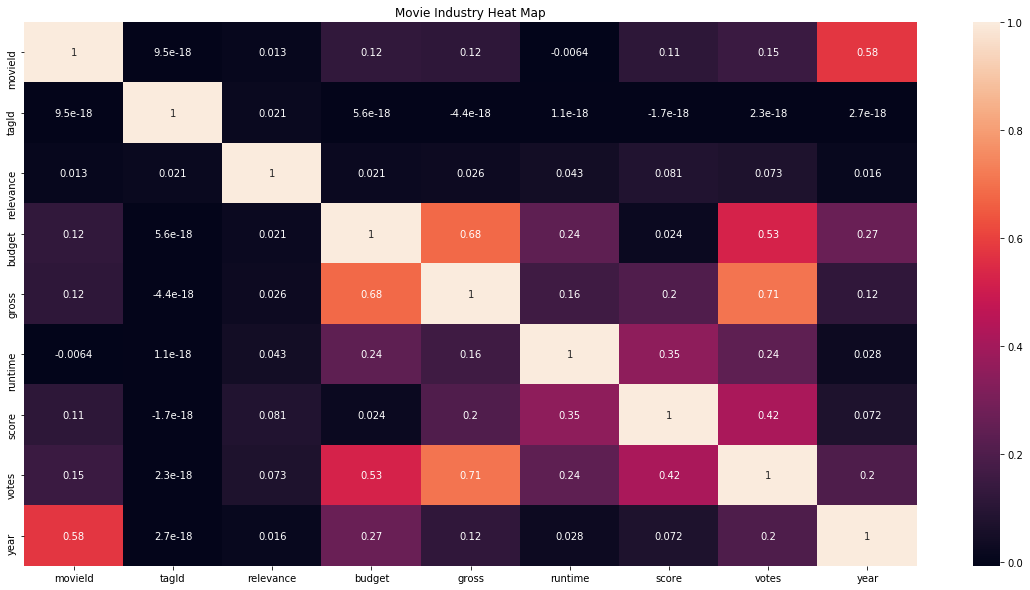

In [39]:
plt.figure(figsize=(20,10))
plt.title("Movie Industry Heat Map")
heat = merged_tags_industry.corr()
sns.heatmap(heat,annot=True) #heatmap showing correlation among variables to find relationships
heat

## To-Do

Merge dataset for Oscar and find factors that drive Oscar winner by category.

In [40]:
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [41]:
tags_and_industry.head() #perform merge here and only top relevant tags will be pulled into "oscar" dataset

,movieId,tagId,relevance,title,genres,tag,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
589585,1882,881,1.0,Godzilla,Action|Sci-Fi|Thriller,saturn award (best special effects),160000000.0,Warner Bros.,USA,Gareth Edwards,Action,200676069.0,PG-13,2014-05-16,123,6.4,Aaron Taylor-Johnson,323734,Max Borenstein,2014
260264,176599,1027,1.0,Naked,Comedy,time loop,0.0,Thin Man Films,UK,Mike Leigh,Comedy,1769305.0,NOT RATED,1994-02-04,132,7.9,David Thewlis,26378,Mike Leigh,1993
894986,4011,483,1.0,Snatch,Comedy|Crime|Thriller,gypsy accent,0.0,Columbia Pictures Corporation,UK,Guy Ritchie,Comedy,30328156.0,R,2001-01-19,104,8.3,Jason Statham,654846,Guy Ritchie,2000
7897,10,2,1.0,GoldenEye,Action|Adventure|Thriller,007 (series),60000000.0,Eon Productions,UK,Martin Campbell,Action,106600000.0,PG-13,1995-11-17,130,7.2,Pierce Brosnan,209588,Ian Fleming,1995
516978,112911,89,1.0,Hercules,Action|Adventure,author:alan moore,85000000.0,Walt Disney Pictures,USA,Ron Clements,Animation,99046791.0,G,1997-06-27,93,7.2,Tate Donovan,159637,Ron Clements,1997


In [42]:
oscar = oscar.rename(columns={"film":"title"})
oscar.head()

,year_film,year_ceremony,ceremony,category,name,title,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [43]:
oscar_merged = oscar.merge(tags_and_industry, on=['title'])
oscar_merged.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,movieId,tagId,relevance,...,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1069,0.99975,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
1,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1106,0.99875,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
2,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1067,0.99700,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
3,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,19,0.97800,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
4,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,710,0.95375,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003


In [44]:
make_dummy = lambda x: 1 if x == True else 0 #make winner a dummy variable
oscar_merged['winner_dummy']=oscar_merged['winner'].apply(make_dummy)

In [45]:
oscar_merged.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,movieId,tagId,relevance,...,gross,rating,released,runtime,score,star,votes,writer,year,winner_dummy
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1069,0.99975,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
1,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1106,0.99875,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
2,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,1067,0.99700,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
3,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,19,0.97800,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
4,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,6754,710,0.95375,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1


,year_film,year_ceremony,ceremony,winner,movieId,tagId,relevance,budget,gross,runtime,score,votes,year,winner_dummy
year_film,1.000000e+00,1.000000e+00,9.999965e-01,-1.418005e-01,3.656154e-01,-4.914703e-18,0.057712,1.966637e-01,1.875640e-01,-1.809435e-01,3.657598e-01,2.955014e-01,3.633611e-01,-1.418005e-01
year_ceremony,1.000000e+00,1.000000e+00,9.999965e-01,-1.418005e-01,3.656154e-01,-4.914703e-18,0.057712,1.966637e-01,1.875640e-01,-1.809435e-01,3.657598e-01,2.955014e-01,3.633611e-01,-1.418005e-01
ceremony,9.999965e-01,9.999965e-01,1.000000e+00,-1.418116e-01,3.657309e-01,1.845135e-19,0.057717,1.966602e-01,1.875864e-01,-1.810600e-01,3.658736e-01,2.955857e-01,3.634778e-01,-1.418116e-01
winner,-1.418005e-01,-1.418005e-01,-1.418116e-01,1.000000e+00,-4.901025e-02,-2.669916e-18,0.015663,9.677753e-02,1.795702e-01,8.238652e-02,9.055766e-02,1.541572e-01,-5.232171e-02,1.000000e+00
movieId,3.656154e-01,3.656154e-01,3.657309e-01,-4.901025e-02,1.000000e+00,5.880164e-18,0.021103,9.927134e-02,3.814024e-02,-1.449561e-01,1.197165e-01,9.528927e-02,5.475969e-01,-4.901025e-02
tagId,-4.914703e-18,-4.914703e-18,1.845135e-19,-2.669916e-18,5.880164e-18,1.000000e+00,0.008651,-6.936979e-19,-2.917961e-18,-5.222075e-18,-2.843927e-18,-2.548828e-19,7.331241e-18,-2.669916e-18
relevance,5.771220e-02,5.771220e-02,5.771658e-02,1.566269e-02,2.110263e-02,8.651075e-03,1.000000,2.729087e-02,3.242026e-02,-2.080041e-03,9.530043e-02,9.476432e-02,2.657238e-02,1.566269e-02
budget,1.966637e-01,1.966637e-01,1.966602e-01,9.677753e-02,9.927134e-02,-6.936979e-19,0.027291,1.000000e+00,7.585746e-01,1.434086e-01,1.506555e-01,6.276766e-01,2.911173e-01,9.677753e-02
gross,1.875640e-01,1.875640e-01,1.875864e-01,1.795702e-01,3.814024e-02,-2.917961e-18,0.032420,7.585746e-01,1.000000e+00,1.230655e-01,2.995162e-01,7.037583e-01,4.278182e-02,1.795702e-01
runtime,-1.809435e-01,-1.809435e-01,-1.810600e-01,8.238652e-02,-1.449561e-01,-5.222075e-18,-0.002080,1.434086e-01,1.230655e-01,1.000000e+00,3.737577e-01,1.276010e-01,-2.019525e-01,8.238652e-02


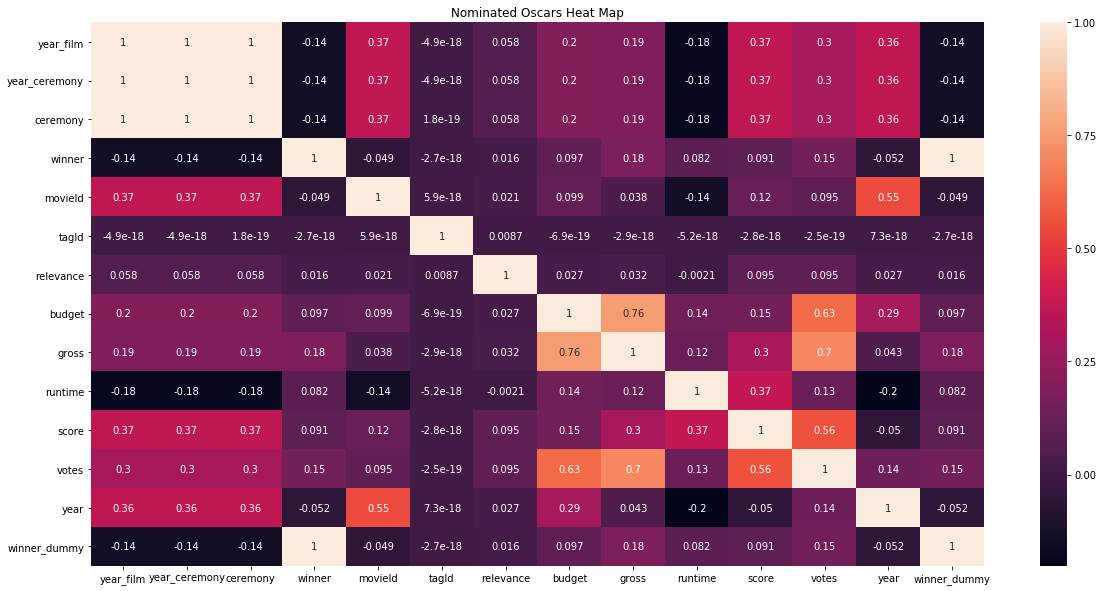

In [46]:
#heatmap showing correlation among variables to find relationships

plt.figure(figsize=(20,10))
plt.title("Nominated Oscars Heat Map")
heat = oscar_merged.corr()
sns.heatmap(heat,annot=True) 
heat

In [47]:
#weak correlation between gross and winner_dummy and between votes and winner_dummy; .086 between budget and winner_dummy
#duplicates for same award due to merging with tags so I'm going to do the same analysis with only movies merged in
oscar_and_movies = oscar.merge(movies, on=['title'])
oscar_and_movies = oscar_and_movies.merge(movie_industry, on=['title'])
oscar_and_movies.info()
#oscar drops from 10k to 3k because merge function drops null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627 entries, 0 to 3626
Data columns (total 23 columns):
year_film        3627 non-null int64
year_ceremony    3627 non-null int64
ceremony         3627 non-null int64
category         3627 non-null object
name             3627 non-null object
title            3627 non-null object
winner           3627 non-null bool
movieId          3627 non-null int64
genres           3627 non-null object
budget           3627 non-null float64
company          3627 non-null object
country          3627 non-null object
director         3627 non-null object
genre            3627 non-null object
gross            3627 non-null float64
rating           3627 non-null object
released         3627 non-null object
runtime          3627 non-null int64
score            3627 non-null float64
star             3627 non-null object
votes            3627 non-null int64
writer           3627 non-null object
year             3627 non-null int64
dtypes: bool(1), float64(

In [48]:
#3627 unique films

oscar_and_movies['title'].unique()
len(oscar_and_movies['title'])

3627

In [49]:
oscar_and_movies['category'].unique()
len(oscar_and_movies['category'].unique())

73

In [50]:
oscar_movies_only = oscar.merge(movie_industry, on=['title'])

In [51]:
#2930 observations
oscar_movies_only.describe() 
oscar_movies_only.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,genre,gross,rating,released,runtime,score,star,votes,writer,year
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,22000000.0,Lakeshore Entertainment,USA,...,Action,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003
1,1928,1929,2,ACTOR,Lewis Stone,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000
2,1928,1929,2,ART DIRECTION,Hans Dreier,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000
3,1928,1929,2,DIRECTING,Ernst Lubitsch,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000
4,1928,1929,2,OUTSTANDING PICTURE,Paramount Famous Lasky,The Patriot,False,110000000.0,Columbia Pictures Corporation,USA,...,Action,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000


In [52]:
#Make Oscar winner a dummy variable
make_dummy = lambda x: 1 if x == True else 0 
oscar_movies_only['winner_dummy']=oscar_movies_only['winner'].apply(make_dummy)
oscar_movies_only.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 22 columns):
year_film        2930 non-null int64
year_ceremony    2930 non-null int64
ceremony         2930 non-null int64
category         2930 non-null object
name             2930 non-null object
title            2930 non-null object
winner           2930 non-null bool
budget           2930 non-null float64
company          2930 non-null object
country          2930 non-null object
director         2930 non-null object
genre            2930 non-null object
gross            2930 non-null float64
rating           2930 non-null object
released         2930 non-null object
runtime          2930 non-null int64
score            2930 non-null float64
star             2930 non-null object
votes            2930 non-null int64
writer           2930 non-null object
year             2930 non-null int64
winner_dummy     2930 non-null int64
dtypes: bool(1), float64(3), int64(7), object(11)
memory usage:

,year_film,year_ceremony,ceremony,winner,budget,gross,runtime,score,votes,year,winner_dummy
year_film,1.000000,1.000000,0.999993,-0.041095,0.122277,0.179857,0.045515,0.423338,0.254483,0.441246,-0.041095
year_ceremony,1.000000,1.000000,0.999993,-0.041095,0.122277,0.179857,0.045515,0.423338,0.254483,0.441246,-0.041095
ceremony,0.999993,0.999993,1.000000,-0.041024,0.122441,0.179977,0.045637,0.423635,0.254624,0.441579,-0.041024
winner,-0.041095,-0.041095,-0.041024,1.000000,0.055273,0.127834,0.065598,0.113977,0.169524,-0.009411,1.000000
budget,0.122277,0.122277,0.122441,0.055273,1.000000,0.709687,0.279302,0.041346,0.419670,0.285509,0.055273
gross,0.179857,0.179857,0.179977,0.127834,0.709687,1.000000,0.243034,0.278842,0.616072,0.134161,0.127834
runtime,0.045515,0.045515,0.045637,0.065598,0.279302,0.243034,1.000000,0.344947,0.342719,-0.036445,0.065598
score,0.423338,0.423338,0.423635,0.113977,0.041346,0.278842,0.344947,1.000000,0.628761,0.042608,0.113977
votes,0.254483,0.254483,0.254624,0.169524,0.419670,0.616072,0.342719,0.628761,1.000000,0.167007,0.169524
year,0.441246,0.441246,0.441579,-0.009411,0.285509,0.134161,-0.036445,0.042608,0.167007,1.000000,-0.009411


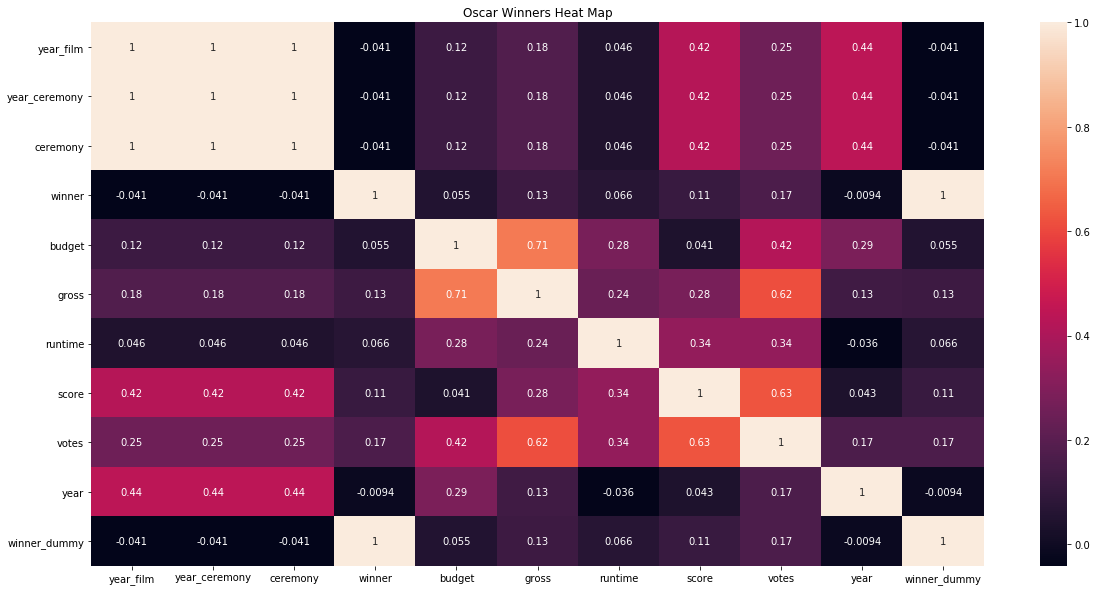

In [55]:
plt.figure(figsize=(20,10))
plt.title("Oscar Winners Heat Map")
heat = oscar_movies_only.corr()
sns.heatmap(heat,annot=True) 
heat

Regression results: Three biggest factors to winner_dummy are: votes, gross, and score. 
Next step: Conduct binary logit test where oscar_winner (1 or 0) = beta*votes + beta2*gross + beta3*score


Text(0.5, 1.0, 'Budget vs. Oscar Winner')

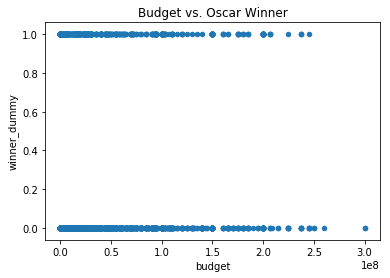

In [56]:
oscar_movies_only.plot.scatter('budget','winner_dummy')
plt.title("Budget vs. Oscar Winner")

Text(0.5, 1.0, 'Oscar Budget Histogram')

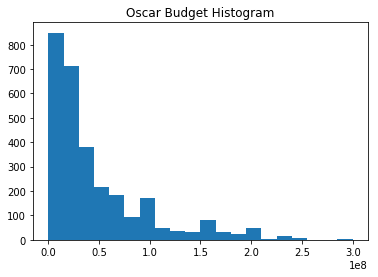

In [58]:
plt.hist(x=oscar_movies_only.budget, bins = 20)
plt.title("Oscar Budget Histogram")

In [59]:
#filter dataset for only winners
oscar_winners = oscar_movies_only[oscar_movies_only.winner_dummy == 1]


In [60]:
oscar_winners.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,gross,rating,released,runtime,score,star,votes,writer,year,winner_dummy
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,22000000.0,Lakeshore Entertainment,USA,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
5,1928,1929,2,WRITING,Hans Kraly,The Patriot,True,110000000.0,Columbia Pictures Corporation,USA,...,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000,1
11,1996,1997,69,MUSIC (Original Musical or Comedy Score),Rachel Portman,Emma,True,6000000.0,Miramax,UK,...,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996,1
12,1932,1933,6,ACTRESS,Katharine Hepburn,Morning Glory,True,0.0,Dove Audio,USA,...,21647.0,PG-13,1993-09-17,96,6.6,Christopher Reeve,315,Charles Jarrott,1993,1
13,1932,1933,6,ACTRESS,Katharine Hepburn,Morning Glory,True,40000000.0,Bad Robot,USA,...,31011732.0,PG-13,2010-11-10,100,6.5,Rachel McAdams,62536,Aline Brosh McKenna,2010,1


Text(0.5, 1.0, 'Oscar Winners Budget Histogram')

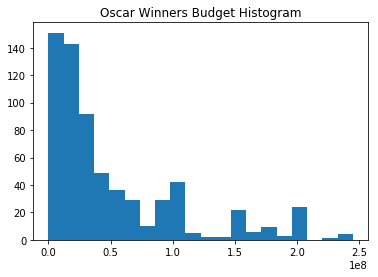

In [61]:
plt.hist(x=oscar_winners.budget, bins = 20)
plt.title("Oscar Winners Budget Histogram")


Text(0.5, 1.0, 'Oscar Winners Votes Histogram')

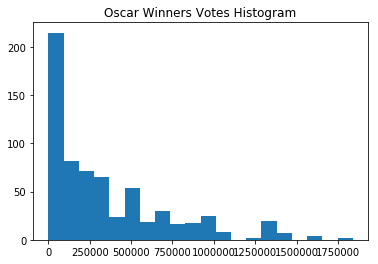

In [62]:
plt.hist(x=oscar_winners.votes, bins = 20)
plt.title("Oscar Winners Votes Histogram")


Text(0.5, 1.0, 'Oscar Winners Score Histogram')

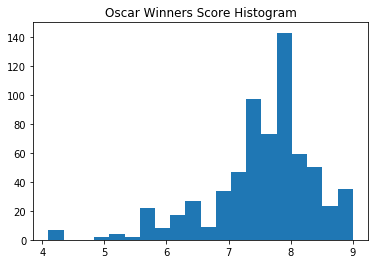

In [63]:
plt.hist(x=oscar_winners.score, bins = 20)
plt.title("Oscar Winners Score Histogram")

Text(0.5, 1.0, 'Budget by Category')

<Figure size 7200x720 with 0 Axes>

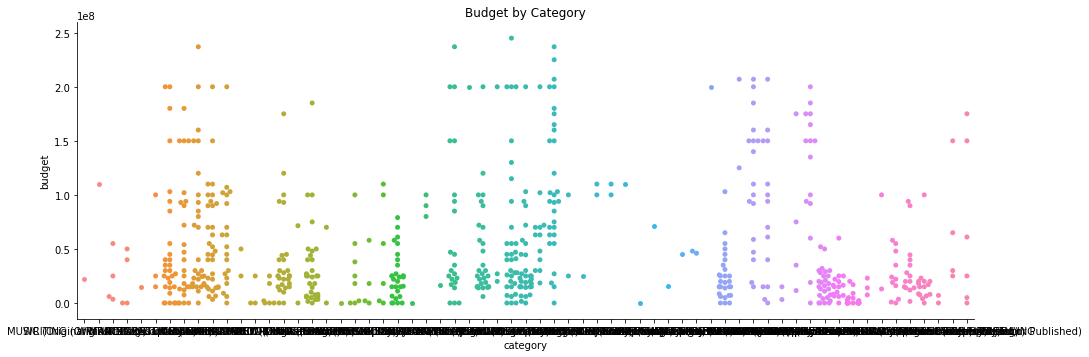

In [64]:
#plotting budget by category
#need to relabel category with number tag for readability
plt.figure(figsize=(100,10))
sns.catplot(x="category", y="budget", data=oscar_winners, kind='swarm', height=5, aspect=3) 
plt.title("Budget by Category")


In [65]:
oscar_winners.describe()

,year_film,year_ceremony,ceremony,budget,gross,runtime,score,votes,year,winner_dummy
count,659.000000,659.000000,659.000000,6.590000e+02,6.590000e+02,659.000000,659.000000,6.590000e+02,659.000000,659.0
mean,1995.432473,1996.432473,68.440061,5.004263e+07,1.170659e+08,128.629742,7.540668,3.550326e+05,2001.382398,1.0
std,18.384104,18.384104,18.357327,5.504440e+07,1.322289e+08,27.505889,0.854054,3.744011e+05,8.795346,0.0
min,1927.000000,1928.000000,1.000000,0.000000e+00,2.164700e+04,81.000000,4.100000,3.150000e+02,1986.000000,1.0
25%,1990.000000,1991.000000,63.000000,1.400000e+07,2.638468e+07,111.000000,7.200000,7.316100e+04,1994.000000,1.0
50%,1999.000000,2000.000000,72.000000,2.500000e+07,7.533160e+07,123.000000,7.700000,2.074470e+05,2001.000000,1.0
75%,2008.000000,2009.000000,81.000000,7.150000e+07,1.511018e+08,140.000000,8.100000,5.289100e+05,2009.000000,1.0
max,2019.000000,2020.000000,92.000000,2.450000e+08,7.605076e+08,242.000000,9.000000,1.839571e+06,2016.000000,1.0


In [66]:
#Create index for Oscar Nomination Category dictionary 
arr = [0]*659
counter = 0
temp = 0
for i in arr:
    arr[counter] = temp
    counter += 1
    temp += 1
arr = np.array(arr)

In [67]:
#Create list of categories as keys
keys = oscar_winners['category'].astype(str).values.tolist()
type(keys)

list

In [68]:
#create dictionary
cat_dict = dict(zip(keys, arr.T)) 
print(cat_dict)

{'WRITING (Original Story)': 0, 'WRITING': 1, 'MUSIC (Original Musical or Comedy Score)': 317, 'ACTRESS': 67, 'WRITING (Adaptation)': 5, 'ART DIRECTION (Color)': 77, 'COSTUME DESIGN': 655, 'MAKEUP': 549, 'CINEMATOGRAPHY': 644, 'FILM EDITING': 634, 'SOUND': 391, 'SOUND RECORDING': 66, 'CINEMATOGRAPHY (Black-and-White)': 25, 'ART DIRECTION (Black-and-White)': 31, 'MUSIC (Original Score)': 646, 'MUSIC (Song)': 88, 'ACTOR IN A SUPPORTING ROLE': 650, 'WRITING (Motion Picture Story)': 73, 'WRITING (Screenplay)': 21, 'ACTOR': 94, 'COSTUME DESIGN (Black-and-White)': 61, 'BEST MOTION PICTURE': 83, 'ACTRESS IN A SUPPORTING ROLE': 649, 'SHORT SUBJECT (Two-reel)': 41, 'SPECIAL EFFECTS': 87, 'DOCUMENTARY (Feature)': 46, 'ART DIRECTION': 551, 'WRITING (Story and Screenplay)': 49, 'DIRECTING': 645, 'MUSIC (Original Dramatic Score)': 305, 'MUSIC (Original Song)': 647, 'BEST PICTURE': 651, 'SOUND EFFECTS EDITING': 337, 'VISUAL EFFECTS': 640, 'COSTUME DESIGN (Color)': 79, 'MUSIC (Scoring of a Musical Pi

In [69]:
oscar_winners.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,gross,rating,released,runtime,score,star,votes,writer,year,winner_dummy
0,1927,1928,1,WRITING (Original Story),Ben Hecht,Underworld,True,22000000.0,Lakeshore Entertainment,USA,...,51970690.0,R,2003-09-19,121,7.0,Kate Beckinsale,225226,Kevin Grevioux,2003,1
5,1928,1929,2,WRITING,Hans Kraly,The Patriot,True,110000000.0,Columbia Pictures Corporation,USA,...,113330342.0,R,2000-06-28,165,7.2,Mel Gibson,221478,Robert Rodat,2000,1
11,1996,1997,69,MUSIC (Original Musical or Comedy Score),Rachel Portman,Emma,True,6000000.0,Miramax,UK,...,22201883.0,PG,1996-08-30,120,6.7,Gwyneth Paltrow,29972,Jane Austen,1996,1
12,1932,1933,6,ACTRESS,Katharine Hepburn,Morning Glory,True,0.0,Dove Audio,USA,...,21647.0,PG-13,1993-09-17,96,6.6,Christopher Reeve,315,Charles Jarrott,1993,1
13,1932,1933,6,ACTRESS,Katharine Hepburn,Morning Glory,True,40000000.0,Bad Robot,USA,...,31011732.0,PG-13,2010-11-10,100,6.5,Rachel McAdams,62536,Aline Brosh McKenna,2010,1


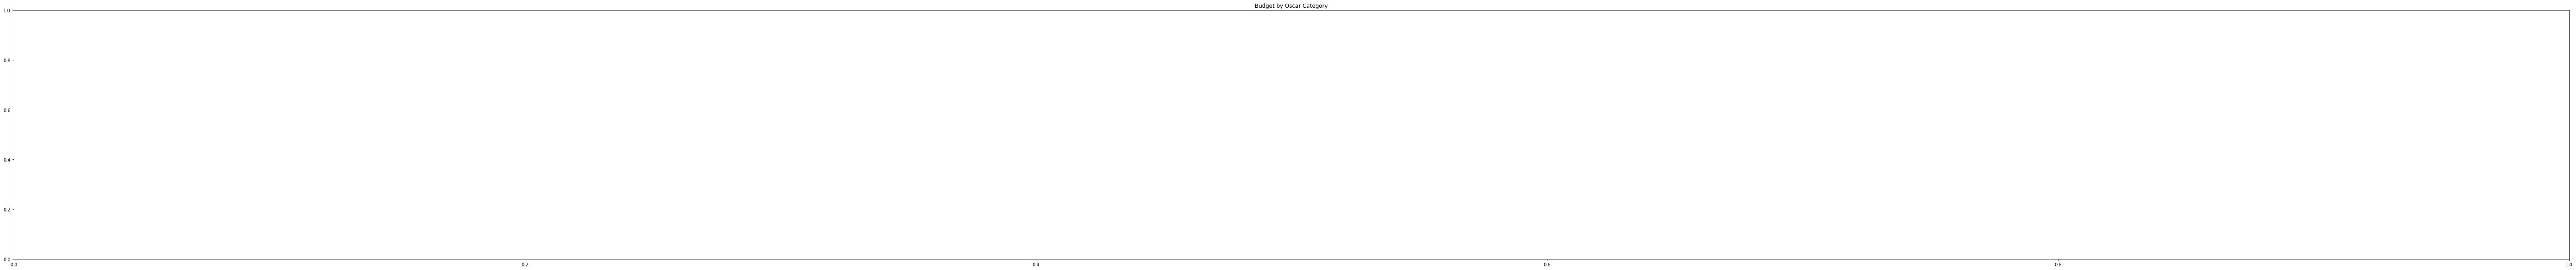

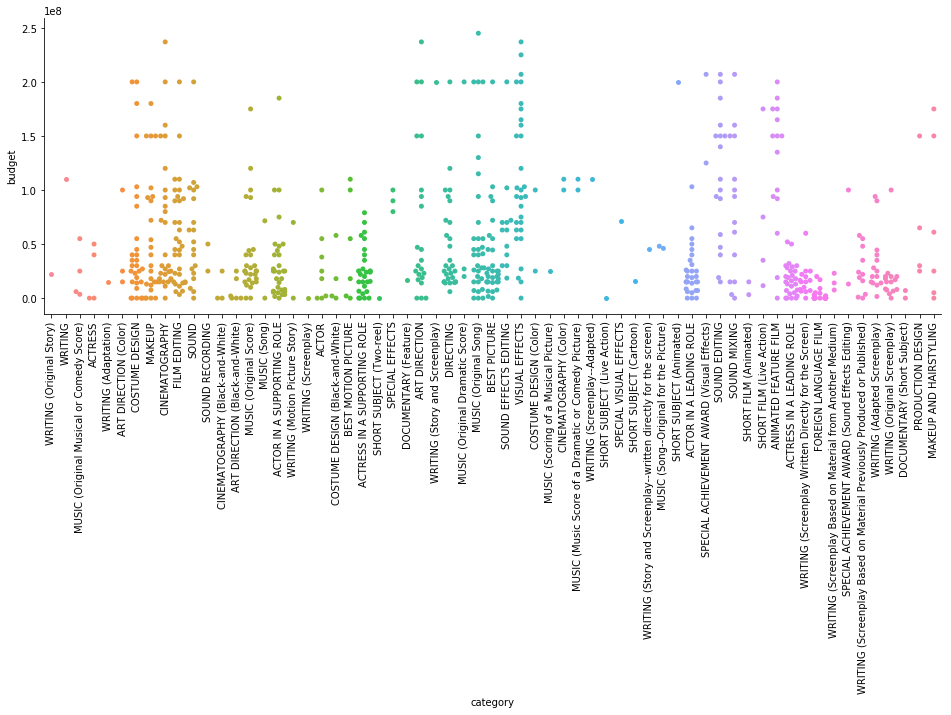

In [72]:
plt.figure(figsize=(100,10))
plt.title("Budget by Oscar Category")
chart = sns.catplot(x="category", y="budget", data=oscar_winners, kind='swarm', height=5, aspect=3) 
budget_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

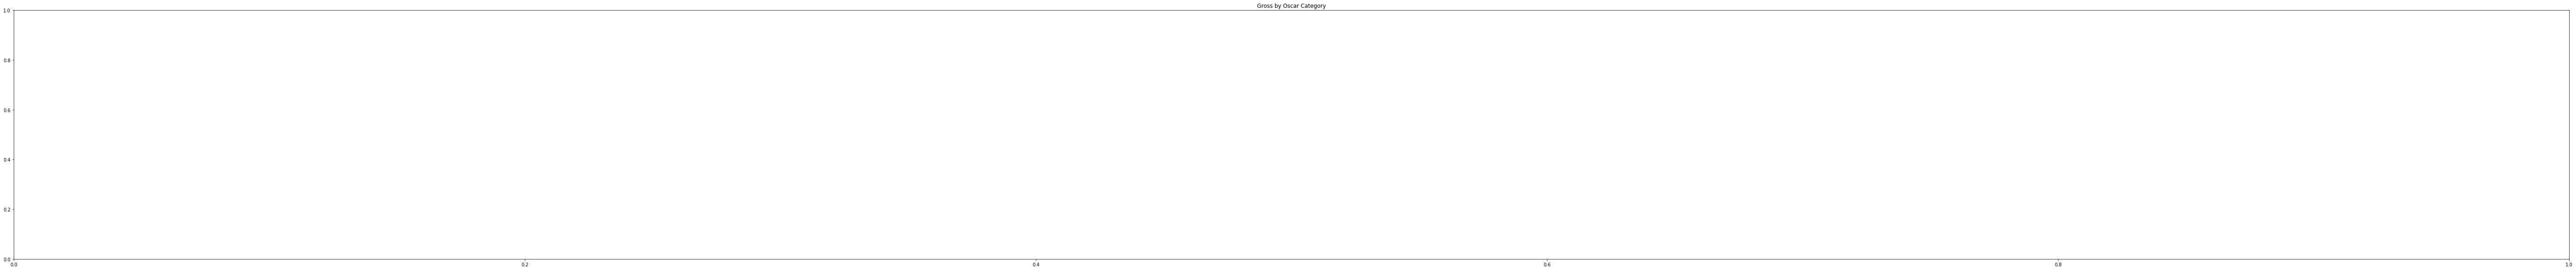

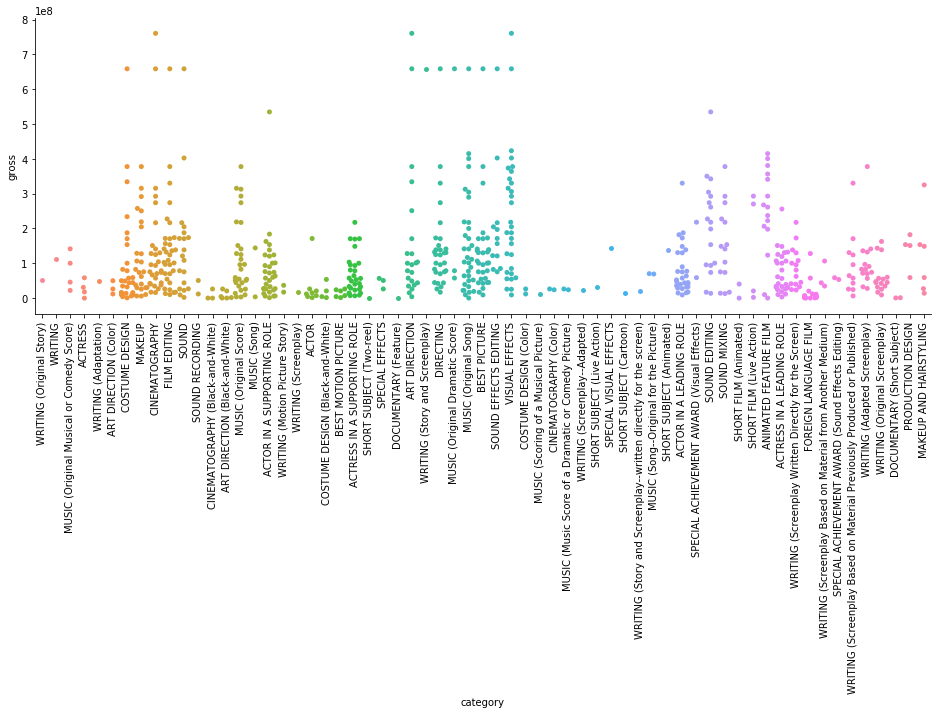

In [73]:
plt.figure(figsize=(100,10))
plt.title("Gross by Oscar Category")
chart = sns.catplot(x="category", y="gross", data=oscar_winners, kind='swarm', height=5, aspect=3) 
gross_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

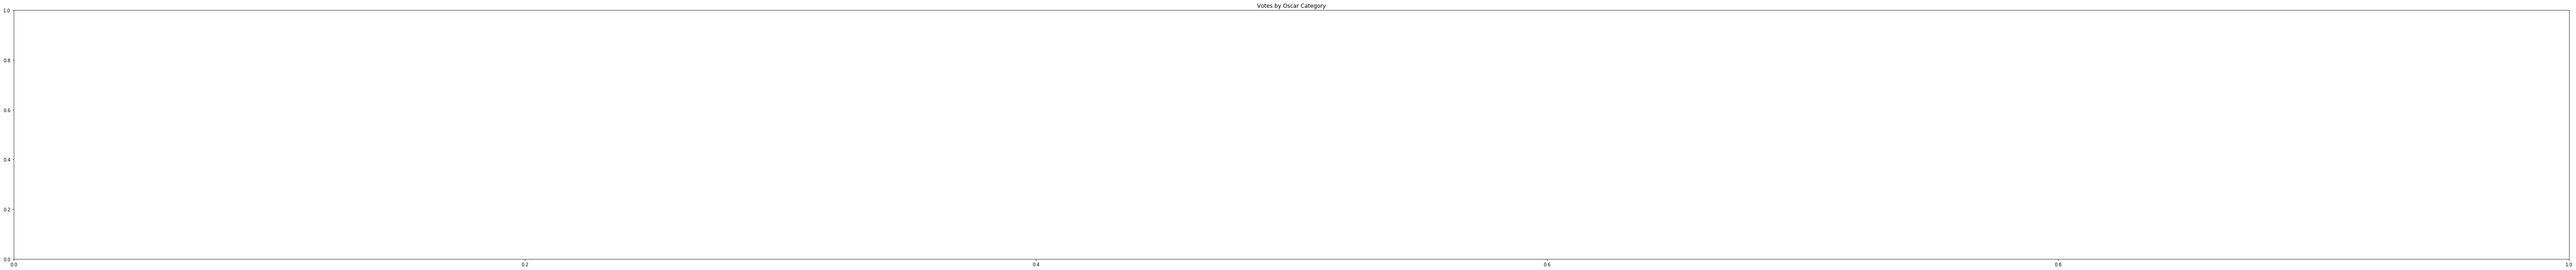

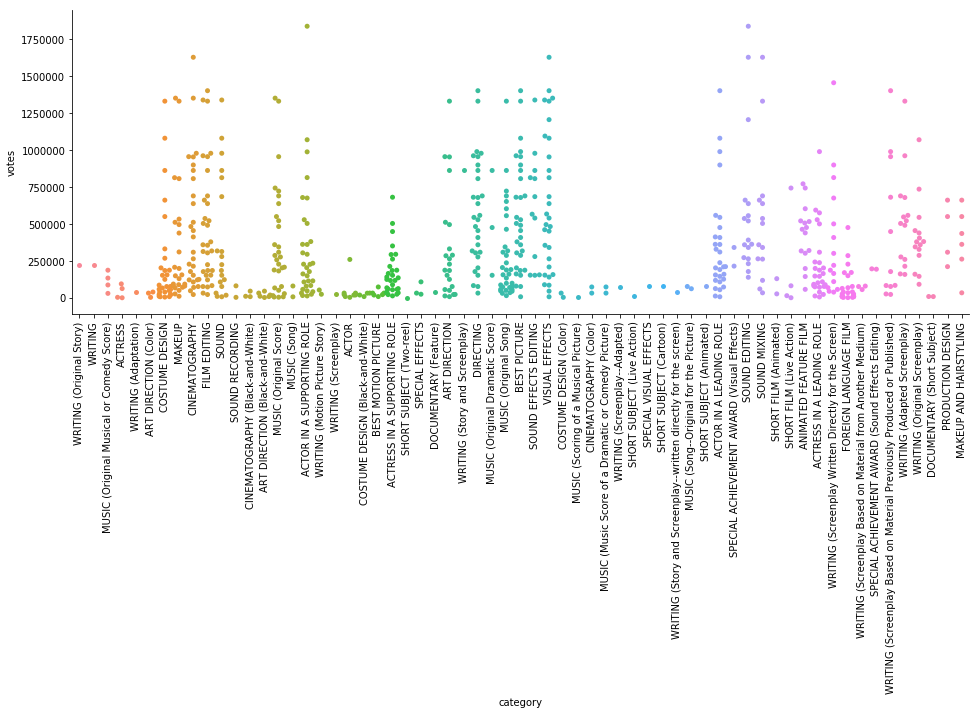

In [75]:
plt.figure(figsize=(100,10))
plt.title("Votes by Oscar Category")
chart = sns.catplot(x="category", y="votes", data=oscar_winners, kind='swarm', height=5, aspect=3) 
votes_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

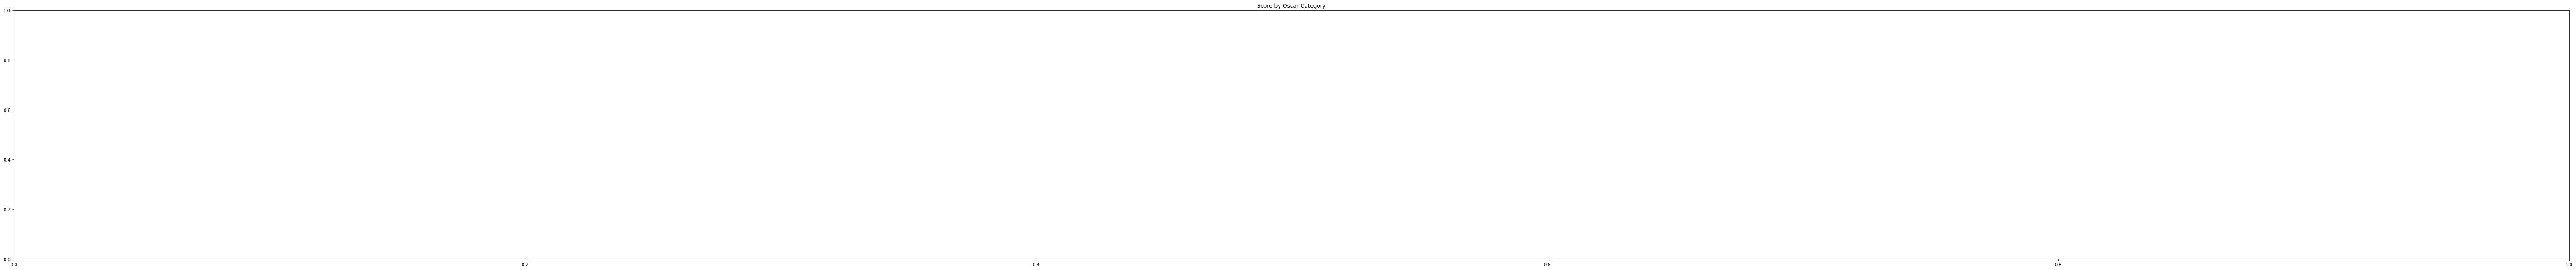

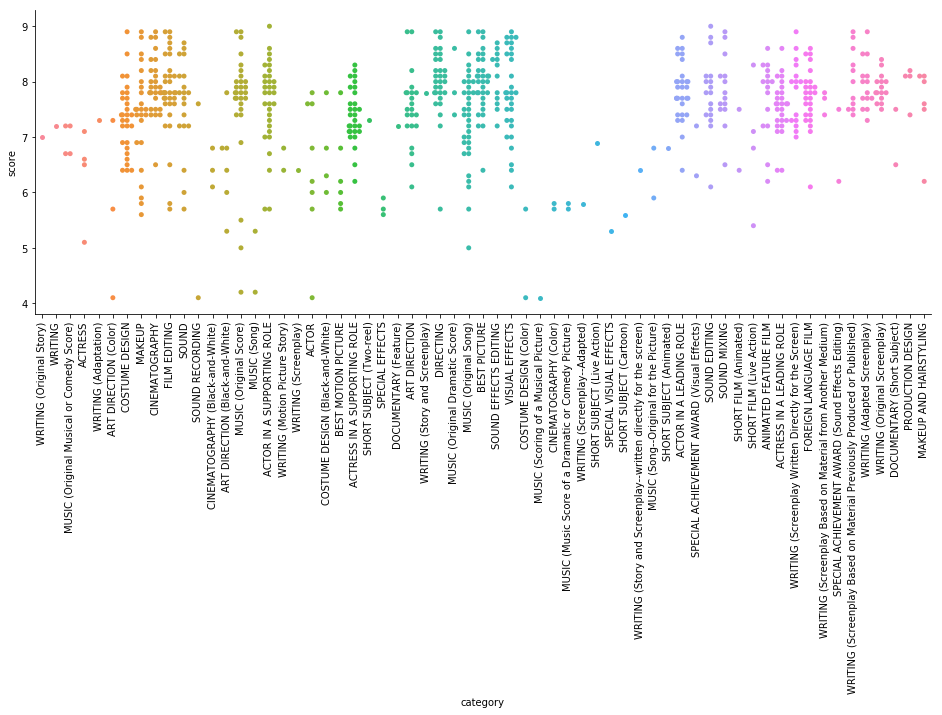

In [74]:
plt.figure(figsize=(100,10))
plt.title("Score by Oscar Category")
chart = sns.catplot(x="category", y="score", data=oscar_winners, kind='swarm', height=5, aspect=3) 
score_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

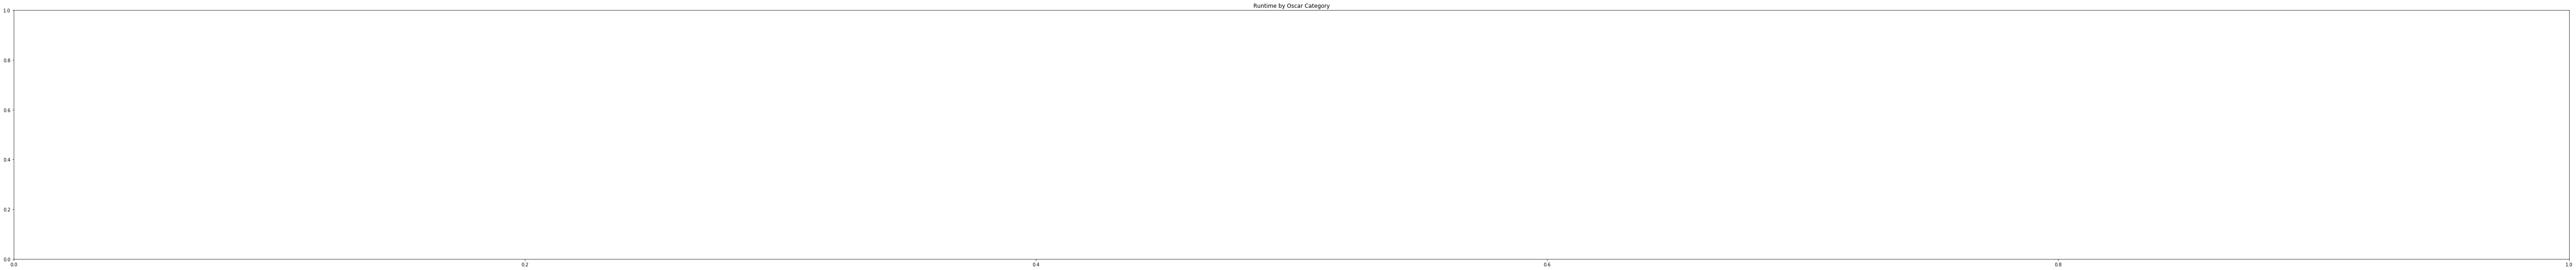

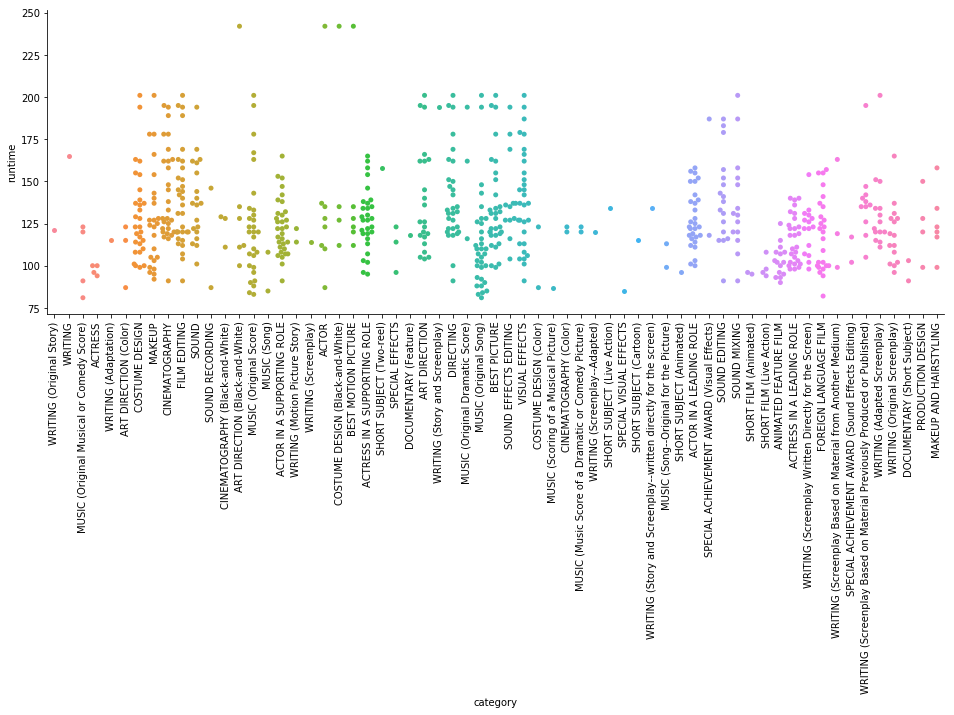

In [76]:
plt.figure(figsize=(100,10))
plt.title("Runtime by Oscar Category")
chart = sns.catplot(x="category", y="runtime", data=oscar_winners, kind='swarm', height=5, aspect=3) 
runtime_chart = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in chart.axes.flat]

## Binomial Logit Regression


In [77]:
#Check data integrity
oscar_movies_only.tail()

,year_film,year_ceremony,ceremony,category,name,title,winner,budget,company,country,...,gross,rating,released,runtime,score,star,votes,writer,year,winner_dummy
2925,2018,2019,91,DOCUMENTARY (Short Subject),Ed Perkins and Jonathan Chinn,Black Sheep,False,0.0,Broadway Pictures,USA,...,32377000.0,PG-13,1996-02-02,87,6.2,Chris Farley,31582,Fred Wolf,1996,0
2926,2018,2019,91,DOCUMENTARY (Short Subject),Ed Perkins and Jonathan Chinn,Black Sheep,False,0.0,New Zealand Film Commission,New Zealand,...,82987.0,NOT RATED,2007-03-29,87,5.8,Oliver Driver,36120,Jonathan King,2006,0
2927,2018,2019,91,SHORT FILM (Live Action),Rodrigo Sorogoyen and María del Puy Alvarado,Mother,False,0.0,Paramount Pictures,USA,...,19119165.0,PG-13,1997-01-24,104,6.9,Albert Brooks,4936,Albert Brooks,1996,0
2928,2018,2019,91,SHORT FILM (Live Action),Rodrigo Sorogoyen and María del Puy Alvarado,Mother,False,5000000.0,CJ Entertainment,South Korea,...,547292.0,R,2009-05-28,129,7.8,Hye-ja Kim,31822,Joon-ho Bong,2009,0
2929,2019,2020,92,DOCUMENTARY (Feature),"Feras Fayyad, Kirstine Barfod and Sigrid Dyekjær",The Cave,False,30000000.0,Screen Gems,USA,...,15007991.0,PG-13,2005-08-26,97,5.1,Piper Perabo,30287,Michael Steinberg,2005,0


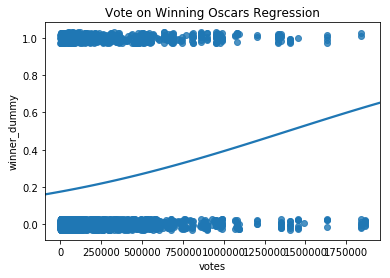

In [79]:
sns.regplot(x="votes", y="winner_dummy", y_jitter = .03, data = oscar_movies_only, logistic = True, ci=None)
plt.title("Vote on Winning Oscars Regression")
plt.show()

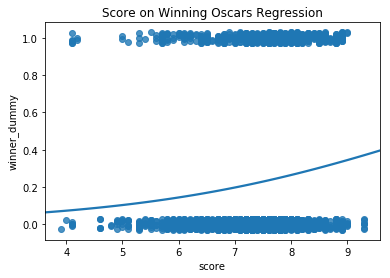

In [80]:
sns.regplot(x="score", y="winner_dummy", y_jitter = .03, data = oscar_movies_only, logistic = True, ci=None)
plt.title("Score on Winning Oscars Regression")
plt.show()

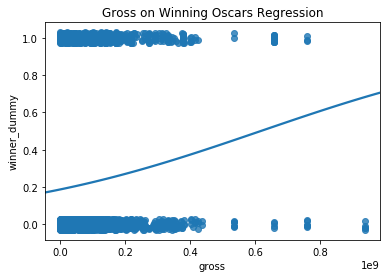

In [81]:
sns.regplot(x="gross", y="winner_dummy", y_jitter = .03, data = oscar_movies_only, logistic = True, ci=None)
plt.title("Gross on Winning Oscars Regression")
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(oscar_movies_only, test_size = .2, random_state = 42)

In [83]:
from statsmodels.formula.api import logit
import statsmodels.api as sm

#Regress whether or not a movie wins Oscar based off of votes, scores, gross, runtime, and budget
formula = ('winner_dummy ~ votes + score + gross + runtime + budget')
model = logit(formula = formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.529261
         Iterations 6


In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           winner_dummy   No. Observations:                 2344
Model:                          Logit   Df Residuals:                     2338
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Oct 2020   Pseudo R-squ.:                 0.02585
Time:                        13:54:53   Log-Likelihood:                -1240.6
converged:                       True   LL-Null:                       -1273.5
Covariance Type:            nonrobust   LLR p-value:                 7.479e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0374      0.666     -3.059      0.002      -3.343      -0.732
votes       7.547e-07   2.35e-07      3.214      0.001    2.95e-07    1.21e-06
score          0.0376      0.094      0.402      0.688      -0.146       0.221
gross       1.817e-09   6.79e-10      2.677      0.007    4.86e-10    3.15e-09
runtime        0.0025      0.002      1.145      0.252      -0.002       0.007
budget     -2.892e-09   1.49e-09     -1.935      0.053   -5.82e-09    3.78e-11
==============================================================================
"""

Only votes has significant predictive value on winning the Oscar, which is intuitive. 